# Machine Learning flow
## Import relevant packages and dataset

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('PNRdatabase3.csv') # load dataset (csv file) with pandas

## Define features (X) and targets (y)

In [63]:
train = data.drop(['Type40LP','MetalStack','Date','RowDirection','DoubleBack','FlipFirstRow','StartfromFirstRow'],axis=1)
X = train.drop(['Violations','AntennaViolations','RunTimeRoute','RunTimePlace'],axis=1)
y = train['RunTimeRoute']
z = train['RunTimePlace']

## Split dataset into train and test sets

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
print('X shape:',X.shape)
print('y shape:',y.shape)
print('z shape:',z.shape)
print('X train, X test:',X_train.shape,X_test.shape)
print('y train, y test:',y_train.shape,y_test.shape)
print('z train, z test:',z_train.shape,z_test.shape)

X shape: (106, 28)
y shape: (106,)
z shape: (106,)
X train, X test: (84, 28) (22, 28)
y train, y test: (84,) (22,)
z train, z test: (84,) (22,)


## Find best regression model from scikit-learn using k-fold cross validation
- Metrics used: root mean squared error
- number of folds: 10

In [65]:
from sklearn.linear_model import LinearRegression    
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor   
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

Regressors = [
    LinearRegression(),
    Ridge(max_iter=10000),
    Lasso(max_iter=10000),
    ElasticNet(max_iter=10000),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    SVR(max_iter=10000),
    GradientBoostingRegressor(),
    RandomForestRegressor()
]

from sklearn.model_selection import cross_val_score

best_score_route = 100
best_score_place = 100

for regressor in Regressors:
    cv_results_route = -cross_val_score(regressor, X, y, scoring='neg_root_mean_squared_error', cv=10 )
    cv_results_place = -cross_val_score(regressor, X, z, scoring='neg_root_mean_squared_error', cv=10 )
    if best_score_route > cv_results_route.mean():
        best_score_route = cv_results_route.mean()
        best_regressor_route = regressor
    if best_score_place > cv_results_place.mean():
        best_score_place = cv_results_place.mean()
        best_regressor_place = regressor
    print(regressor, cv_results_route.mean())
    print(regressor, cv_results_route2.mean())                  
    print(regressor, cv_results_place.mean())
        
print('best score (route) is: ',best_score_route)
print('best regressor (route) is: ',best_regressor_route)
        
print('best score (place) is: ',best_score_place)
print('best regressor (place) is: ',best_regressor_place)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 55.42702371382078
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) -28.668518181818182
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 60.519222650816474
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001) 67.58382214495762
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001) -28.668518181818182
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=None, solver='auto', tol=0.001) 37.98918684800973
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 63.41155309361117
Lasso(alpha=1.0, copy_X=True,

## Tune model's hyperparameters with GridsearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
C_range = [1,10,100,1000,10000]
param_grid = dict(C= C_range)
svr = SVR()
search = GridSearchCV(estimator = svr, param_grid = param_grid, scoring='neg_root_mean_squared_error', cv=10)
search.fit(X_train,y_train)
print(search.best_estimator_)
print(search.cv_results_['mean_test_score'])

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[-45.8610118  -45.90209742 -45.85512119 -45.78233065 -46.52998992]


Text(0, 0.5, 'Cross-Validated Negative RMSE')

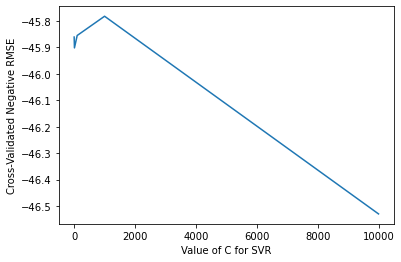

In [27]:
# plot results of GridSearchCV
plt.plot(C_range, search.cv_results_['mean_test_score'])
plt.xlabel('Value of C for SVR')
plt.ylabel('Cross-Validated Negative RMSE')

In [55]:
from sklearn import metrics
svr_test = SVR(C=1000)
svr_test.fit(X_train,y_train)
y_pred = svr_test.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[77.46515322 64.17397211 73.92056292 80.82096348 71.93547285 73.50871391
 76.71595735 69.96184051 72.42149345 70.49639909 80.76614385 72.67377804
 79.94069304 69.37974061 77.21271827 75.30246021 70.099257   76.7244794
 67.30235839 73.33661135 77.56862629 74.25838023]
65.63513166619781


Text(0, 0.5, 'y_pred')

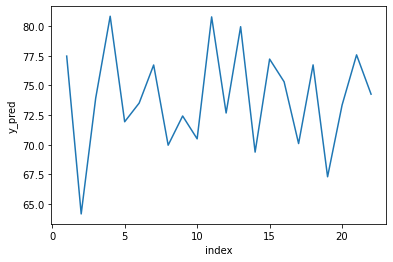

In [57]:
testlist = list(range(1,23))
plt.plot(testlist, y_pred)
plt.xlabel('index')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_test')

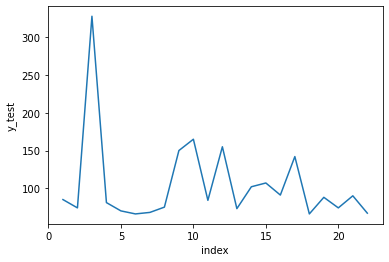

In [58]:
plt.plot(testlist, y_test)
plt.xlabel('index')
plt.ylabel('y_test')

In [59]:
svr_test.fit(X_train,z_train)
z_pred = svr_test.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(z_test, z_pred)))

27.040024808495428


Text(0, 0.5, 'z_pred')

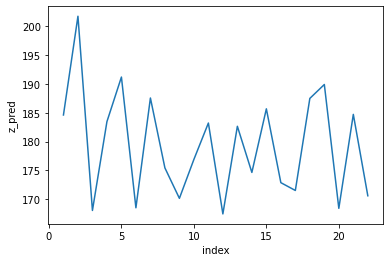

In [60]:
testlist = list(range(1,23))
plt.plot(testlist, z_pred)
plt.xlabel('index')
plt.ylabel('z_pred')

Text(0, 0.5, 'z_test')

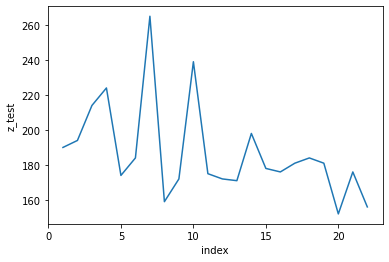

In [61]:
plt.plot(testlist, z_test)
plt.xlabel('index')
plt.ylabel('z_test')